In [1]:
import os
from netCDF4 import Dataset
import netCDF4 as nc
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from scipy.interpolate import griddata
import matplotlib.ticker as mticker

In [2]:
# To use PLUMBER2_GPP_common_utils, change directory to where it exists
os.chdir('/g/data/w97/mm3972/scripts/Drought/Post_drought_rainfall')
from common_utils import *

In [3]:
scale_factor  = 0.001
missing_value = 32767

# Conclusion: 

The downloaded files are ok, but there are large-scale missing data during 22-27 June 2001 in the MCD43A3 product

# BSA_nir

In [5]:
albedo_band   = "BSA_nir"
var_name      = "Albedo_"+albedo_band
AWAP_5km_path = "/g/data/w97/mm3972/data/MODIS/MODIS_Albedo/AUS/regrid_2_AWAP_5km_daily/MCD43A3.061_500m_aid0001_"+albedo_band+"_2000-2024_albedo_regridded_daily.nc"

In [9]:
f_check_download = nc.Dataset(AWAP_5km_path,'r')
var_download     = f_check_download.variables[var_name][:]*scale_factor
var_download     = np.where(var_download > 1.0, np.nan, var_download)
var_download_mean= np.mean(var_download,axis=0)
var_download_cum = np.cumsum(var_download, axis=0)

In [44]:
# plt.imshow(var_download[451,:,:])
ntime = np.shape(var_download)[0]
nlat  = np.shape(var_download)[1]
nlon  = np.shape(var_download)[2]

for i in np.arange(ntime):
    missing_percent = np.sum(~np.isnan(var_download[i,:,:]))/841/451
    if missing_percent < 0.5:
        print(i, missing_percent)

0 0.4757587182400848
169 0.48849564055039535
170 0.4697501390752747
171 0.4815089205913138
483 0.4265273892604886
484 0.26818458650482085
485 0.0009280473304138511
486 0.0009280473304138511
487 0.0
488 0.0
489 0.02565312649126924
490 0.3961180202008484


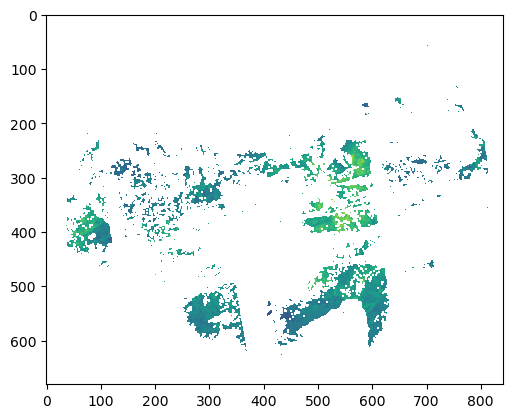

In [48]:
plt.imshow(var_download[484,:,:])

# BSA_vis

In [49]:
albedo_band   = "BSA_vis"
var_name      = "Albedo_"+albedo_band
AWAP_5km_path = "/g/data/w97/mm3972/data/MODIS/MODIS_Albedo/AUS/regrid_2_AWAP_5km_daily/MCD43A3.061_500m_aid0001_"+albedo_band+"_2000-2024_albedo_regridded_daily.nc"

In [50]:
f_check_download = nc.Dataset(AWAP_5km_path,'r')
var_download     = f_check_download.variables[var_name][:]*scale_factor
var_download     = np.where(var_download > 1.0, np.nan, var_download)

ntime = np.shape(var_download)[0]
nlat  = np.shape(var_download)[1]
nlon  = np.shape(var_download)[2]

for i in np.arange(ntime):
    missing_percent = np.sum(~np.isnan(var_download[i,:,:]))/841/451
    if missing_percent < 0.5:
        print(i, missing_percent)

483 0.444112831572592
484 0.28074222694448325
485 0.0009254108323160845
486 0.0009254108323160845
487 0.0
488 0.0
489 0.0317856210666744
490 0.4330711775391454


# WSA_nir

In [51]:
albedo_band   = "WSA_nir"
var_name      = "Albedo_"+albedo_band
AWAP_5km_path = "/g/data/w97/mm3972/data/MODIS/MODIS_Albedo/AUS/regrid_2_AWAP_5km_daily/MCD43A3.061_500m_aid0001_"+albedo_band+"_2000-2024_albedo_regridded_daily.nc"

In [52]:
f_check_download = nc.Dataset(AWAP_5km_path,'r')
var_download     = f_check_download.variables[var_name][:]*scale_factor
var_download     = np.where(var_download > 1.0, np.nan, var_download)

ntime = np.shape(var_download)[0]
nlat  = np.shape(var_download)[1]
nlon  = np.shape(var_download)[2]

for i in np.arange(ntime):
    missing_percent = np.sum(~np.isnan(var_download[i,:,:]))/841/451
    if missing_percent < 0.5:
        print(i, missing_percent)

0 0.4757587182400848
169 0.48849564055039535
170 0.4697501390752747
171 0.4815089205913138
483 0.4265273892604886
484 0.26818458650482085
485 0.0009280473304138511
486 0.0009280473304138511
487 0.0
488 0.0
489 0.02565312649126924
490 0.3961180202008484


# WSA_vis

In [53]:
albedo_band   = "WSA_vis"
var_name      = "Albedo_"+albedo_band
AWAP_5km_path = "/g/data/w97/mm3972/data/MODIS/MODIS_Albedo/AUS/regrid_2_AWAP_5km_daily/MCD43A3.061_500m_aid0001_"+albedo_band+"_2000-2024_albedo_regridded_daily.nc"

In [54]:
f_check_download = nc.Dataset(AWAP_5km_path,'r')
var_download     = f_check_download.variables[var_name][:]*scale_factor
var_download     = np.where(var_download > 1.0, np.nan, var_download)

ntime = np.shape(var_download)[0]
nlat  = np.shape(var_download)[1]
nlon  = np.shape(var_download)[2]

for i in np.arange(ntime):
    missing_percent = np.sum(~np.isnan(var_download[i,:,:]))/841/451
    if missing_percent < 0.5:
        print(i, missing_percent)

483 0.444112831572592
484 0.28074222694448325
485 0.0009254108323160845
486 0.0009254108323160845
487 0.0
488 0.0
489 0.0317856210666744
490 0.4330711775391454
